In [2]:
import numpy as np
import math
import pandas as pd
from sklearn.datasets import load_svmlight_file
from functools import partial
import matplotlib.pyplot as plt
import random

In [12]:
from sklearn.preprocessing import normalize

# Adult Dataset

In [793]:
import requests
from io import BytesIO

podactke sam preuzela sa linka:
l = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a"
response = requests.get(l)  #preuzimanje podataka
data = BytesIO(response.content) #pretvaranje u objekat koji load_svmlight_file moze da cita

# ucitavanje 
X, y = load_svmlight_file(data)

In [791]:
from urllib.request import urlopen
from io import BytesIO
url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a"
response = urlopen(url)
data = BytesIO(response.read())
X, y = load_svmlight_file(data)

In [794]:
print(y[:5])

[-1. -1. -1. -1. -1.]


In [219]:
#pretvaram u data frame
data_t = pd.DataFrame(X.todense(), columns=[f'feature_{i+1}' for i in range(X.shape[1])]) #todense petvara retku matricu atributa u gustu
data_t['label'] = y

In [220]:
data_t.head() #u ovom skupu podataka binarni su atributi pa ih nisam skalirala

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,label
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0


In [221]:
data_t.shape #svi atributi su binarni

(32561, 124)

# CINA0 DATASET

In [273]:
import os
os.chdir("C:\\Users\\Vukovic\\Desktop")

In [274]:
cina0= pd.read_csv('cina0_train.data', sep= ' ' , header=None)

In [275]:
cina0.head()

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,1,0,0,0,1,0,0,0,0,0,...,562,562,1,0,1,562,1,0,0,NaN
1,0,0,0,0,1,0,0,0,1,0,...,562,812,1,0,0,749,0,0,0,NaN
2,0,1,0,0,1,0,0,0,1,0,...,624,624,1,0,0,562,0,0,0,NaN
3,0,0,0,0,1,1,0,0,1,0,...,624,812,0,0,1,624,0,0,0,NaN
4,1,0,0,0,1,0,0,0,0,0,...,562,562,1,0,0,874,0,0,0,NaN


In [276]:
cina0.shape #posledjna kolona sadrzi samo NaN vrednosti

(16033, 133)

In [277]:
columns_name_cina0 = [f'feature_{i+1}' for i in  range(cina0.shape[1])]

In [278]:
cina0.columns=columns_name_cina0
cina0.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133
0,1,0,0,0,1,0,0,0,0,0,...,562,562,1,0,1,562,1,0,0,NaN
1,0,0,0,0,1,0,0,0,1,0,...,562,812,1,0,0,749,0,0,0,NaN
2,0,1,0,0,1,0,0,0,1,0,...,624,624,1,0,0,562,0,0,0,NaN
3,0,0,0,0,1,1,0,0,1,0,...,624,812,0,0,1,624,0,0,0,NaN
4,1,0,0,0,1,0,0,0,0,0,...,562,562,1,0,0,874,0,0,0,NaN


In [279]:
cina0= cina0.drop('feature_133', axis=1) #brisem poslednju kolonu(sve su NaN vrednosti)

In [280]:
cina0.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132
0,1,0,0,0,1,0,0,0,0,0,...,0,562,562,1,0,1,562,1,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,562,812,1,0,0,749,0,0,0
2,0,1,0,0,1,0,0,0,1,0,...,0,624,624,1,0,0,562,0,0,0
3,0,0,0,0,1,1,0,0,1,0,...,1,624,812,0,0,1,624,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,562,562,1,0,0,874,0,0,0


In [281]:
#ovde sam posamatrala min i max vrednosti iz svake kolone
min_max_values1 = cina0.describe().loc[['min', 'max']] 
#izdvojila sam kolone koje nisu skalirane
non_normalized_columns1 = min_max_values1.columns[(min_max_values1.loc['max'] > 1) | (min_max_values1.loc['min'] < -1)]


In [282]:
cina0_t=pd.read_csv('cina0_train_targets.targets', sep= ' ' , header=None) #ucitavam lebele

In [283]:
cina0_t.head()

,0
0,1
1,-1
2,-1
3,-1
4,-1


In [284]:
#ovo ako zelim da normiram samo numericke atribute
from sklearn.preprocessing import normalize

cina0[non_normalized_columns1] = normalize(cina0[non_normalized_columns1], axis=0)

In [285]:
cina0['label']= cina0_t #i na kraju dodajem kolonu label

In [286]:
cina0

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,label
0,1,0,0,0,1,0,0,0,0,0,...,0.006804,0.006813,1,0,1,0.006799,1,0,0,1
1,0,0,0,0,1,0,0,0,1,0,...,0.006804,0.009844,1,0,0,0.009062,0,0,0,-1
2,0,1,0,0,1,0,0,0,1,0,...,0.007555,0.007565,1,0,0,0.006799,0,0,0,-1
3,0,0,0,0,1,1,0,0,1,0,...,0.007555,0.009844,0,0,1,0.007549,0,0,0,-1
4,1,0,0,0,1,0,0,0,0,0,...,0.006804,0.006813,1,0,0,0.010574,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16028,0,0,0,0,1,0,0,0,1,0,...,0.006804,0.009844,1,0,0,0.006799,1,0,0,-1
16029,1,0,0,0,1,0,0,0,1,0,...,0.009831,0.010596,1,0,0,0.009824,0,0,0,-1
16030,0,0,0,0,0,0,0,1,1,1,...,0.010582,0.012111,1,0,1,0.007549,0,0,0,-1
16031,1,0,0,0,1,0,0,0,0,0,...,0.006804,0.006813,1,0,0,0.007549,0,0,0,1


# VOICE

In [3]:
from scipy.io import loadmat

In [4]:
mat_data = loadmat('C:\\Users\\Vukovic\\Downloads\\DATAvoice.mat')

In [5]:
voice = pd.DataFrame(mat_data['DATAvoice'])

In [6]:
voice.head()

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,309
0,0.088112,0.041697,0.000480,-3.723300e-06,0.000422,2.458381,6.332160e-07,47.021079,1366.430390,-7.103323,...,2.527583,7.088978,19.753255,54.335046,145.528630,375.097397,921.296579,2137.079844,4697.131077,9931.208257
1,0.161798,0.057364,0.000677,5.466360e-06,0.000206,2.592066,7.228520e-07,93.557936,2582.922776,-23.284761,...,2.841881,7.977363,22.203504,60.993338,163.560972,421.010306,1036.092589,2404.072562,5284.082128,11165.095660
2,0.554508,0.642913,0.007576,-7.443870e-07,0.006488,12.691326,6.946250e-04,52.988422,466.682635,-45.308680,...,1.806103,5.078616,14.135923,38.641654,103.466808,264.654626,649.657090,1507.384591,3315.804236,6974.600636
3,0.031089,0.027108,0.000314,-2.214720e-07,0.000216,0.754288,1.868650e-07,13.982754,417.217249,-1.207741,...,1.999637,5.610448,15.626164,42.943275,115.014976,296.320795,728.284936,1689.586636,3713.818933,7851.139360
4,0.076177,0.039071,0.000302,2.732110e-05,0.001102,1.270034,4.918190e-05,56.373996,1608.317410,-3.491990,...,2.453087,6.902199,19.117609,52.715873,141.113865,363.511021,893.246151,2071.625622,4554.204815,9623.566242


In [7]:
#pd.options.display.float_format = '{:.1f}'.format 

voice.describe()

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,309
count,126.000000,126.000000,126.000000,1.260000e+02,126.000000,126.000000,1.260000e+02,126.000000,126.000000,126.000000,...,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.225683,0.119056,0.001385,-6.951797e-07,0.001061,6.937604,1.660453e-04,82.190214,1796.302230,-39.411240,...,2.500256,7.014055,19.557608,53.680942,143.774055,370.528329,912.494576,2116.358203,4649.660947,9813.389954
std,0.345839,0.180097,0.002124,1.573954e-05,0.001836,24.275232,8.712997e-04,106.894449,1631.244809,98.188655,...,0.361334,1.008572,2.797453,7.698152,20.468616,52.836331,129.246368,296.400010,653.497584,1365.084335
min,0.020443,0.013830,0.000159,-5.832690e-05,0.000060,0.548917,7.679850e-08,13.319091,269.922782,-624.951034,...,1.766418,4.982477,13.914344,38.394547,103.466808,264.654626,649.657090,1507.384591,3216.625092,6700.842161
25%,0.057713,0.028676,0.000320,-5.121152e-06,0.000248,1.158230,4.132030e-07,29.760987,807.453611,-23.075601,...,2.229724,6.245229,17.537973,48.138723,128.924436,331.900606,818.097730,1888.120153,4148.651943,8760.159506
50%,0.103926,0.048597,0.000521,-2.050570e-06,0.000389,2.012467,9.491370e-07,52.594076,1356.767271,-8.833890,...,2.470691,6.942224,19.302296,53.133665,141.675948,366.706743,902.870861,2096.309958,4597.088099,9741.107531
75%,0.192672,0.126339,0.001487,1.938135e-06,0.001029,3.251788,9.886955e-06,91.694761,2380.748969,-4.115575,...,2.705275,7.616985,21.192552,58.065123,155.552562,400.947223,988.909310,2292.902649,5037.683060,10633.458587
max,2.069748,0.933265,0.010925,9.082690e-05,0.010443,218.686963,7.890252e-03,906.320483,12299.065630,-0.603839,...,3.457911,9.705655,26.997531,73.998459,198.333548,510.827345,1257.014110,2916.248441,6406.074011,13537.402520


In [8]:
pd.options.display.float_format = None

In [9]:
#izdvajam kolone koje nisu skalirane
min_max_values = voice.describe().loc[['min', 'max']] 

non_normalized_columns = min_max_values.columns[(min_max_values.loc['max'] > 1) | (min_max_values.loc['min'] < -1)]

In [10]:
list(non_normalized_columns)

[0,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 14,
 31,
 42,
 51,
 52,
 53,
 56,
 57,
 61,
 62,
 64,
 65,
 66,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 80,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 124,
 125,
 126,
 127,
 128,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 255,
 256,
 257,
 258,
 259,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 

In [13]:
voice[non_normalized_columns] = normalize(voice[non_normalized_columns], axis=0)

In [14]:
voice.head()

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,309
0,0.019061,0.041697,0.000480,-3.723300e-06,0.000422,0.008707,6.332160e-07,0.031144,0.050259,-0.006002,...,0.089142,0.089129,0.089079,0.089267,0.089281,0.089290,0.089064,0.089097,0.089128,0.089304
1,0.035002,0.057364,0.000677,5.466360e-06,0.000206,0.009180,7.228520e-07,0.061968,0.095003,-0.019673,...,0.100227,0.100299,0.100128,0.100205,0.100344,0.100219,0.100162,0.100228,0.100265,0.100399
2,0.119957,0.642913,0.007576,-7.443870e-07,0.006488,0.044948,6.946250e-04,0.035097,0.017165,-0.038281,...,0.063697,0.063853,0.063747,0.063484,0.063476,0.062999,0.062804,0.062844,0.062917,0.062717
3,0.006725,0.027108,0.000314,-2.214720e-07,0.000216,0.002671,1.868650e-07,0.009261,0.015346,-0.001020,...,0.070523,0.070540,0.070467,0.070551,0.070561,0.070537,0.070405,0.070440,0.070469,0.070599
4,0.016479,0.039071,0.000302,2.732110e-05,0.001102,0.004498,4.918190e-05,0.037339,0.059156,-0.002950,...,0.086515,0.086781,0.086212,0.086606,0.086573,0.086531,0.086353,0.086368,0.086416,0.086537


In [15]:
#sada ucitavam lebele
mat_data2 = loadmat('C:\\Users\\Vukovic\\Downloads\\LABELSvoice.mat')

In [16]:
voice_labels = pd.DataFrame(mat_data2['LABELSvoice'])

In [17]:
voice_labels.head()

,0
0,-1
1,1
2,1
3,-1
4,1


In [18]:
columns_name = [f'feature_{i+1}' for i in  range(voice.shape[1])]

In [19]:
voice.columns=columns_name
voice.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310
0,0.019061,0.041697,0.000480,-3.723300e-06,0.000422,0.008707,6.332160e-07,0.031144,0.050259,-0.006002,...,0.089142,0.089129,0.089079,0.089267,0.089281,0.089290,0.089064,0.089097,0.089128,0.089304
1,0.035002,0.057364,0.000677,5.466360e-06,0.000206,0.009180,7.228520e-07,0.061968,0.095003,-0.019673,...,0.100227,0.100299,0.100128,0.100205,0.100344,0.100219,0.100162,0.100228,0.100265,0.100399
2,0.119957,0.642913,0.007576,-7.443870e-07,0.006488,0.044948,6.946250e-04,0.035097,0.017165,-0.038281,...,0.063697,0.063853,0.063747,0.063484,0.063476,0.062999,0.062804,0.062844,0.062917,0.062717
3,0.006725,0.027108,0.000314,-2.214720e-07,0.000216,0.002671,1.868650e-07,0.009261,0.015346,-0.001020,...,0.070523,0.070540,0.070467,0.070551,0.070561,0.070537,0.070405,0.070440,0.070469,0.070599
4,0.016479,0.039071,0.000302,2.732110e-05,0.001102,0.004498,4.918190e-05,0.037339,0.059156,-0.002950,...,0.086515,0.086781,0.086212,0.086606,0.086573,0.086531,0.086353,0.086368,0.086416,0.086537


In [20]:
voice['label']=voice_labels

In [21]:
voice.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,label
0,0.019061,0.041697,0.000480,-3.723300e-06,0.000422,0.008707,6.332160e-07,0.031144,0.050259,-0.006002,...,0.089129,0.089079,0.089267,0.089281,0.089290,0.089064,0.089097,0.089128,0.089304,-1
1,0.035002,0.057364,0.000677,5.466360e-06,0.000206,0.009180,7.228520e-07,0.061968,0.095003,-0.019673,...,0.100299,0.100128,0.100205,0.100344,0.100219,0.100162,0.100228,0.100265,0.100399,1
2,0.119957,0.642913,0.007576,-7.443870e-07,0.006488,0.044948,6.946250e-04,0.035097,0.017165,-0.038281,...,0.063853,0.063747,0.063484,0.063476,0.062999,0.062804,0.062844,0.062917,0.062717,1
3,0.006725,0.027108,0.000314,-2.214720e-07,0.000216,0.002671,1.868650e-07,0.009261,0.015346,-0.001020,...,0.070540,0.070467,0.070551,0.070561,0.070537,0.070405,0.070440,0.070469,0.070599,-1
4,0.016479,0.039071,0.000302,2.732110e-05,0.001102,0.004498,4.918190e-05,0.037339,0.059156,-0.002950,...,0.086781,0.086212,0.086606,0.086573,0.086531,0.086353,0.086368,0.086416,0.086537,1


## SLiSeS 

In [22]:
#prvo je potrebno da napravim funkciju f(x)=1/N * sum of fi, fi= 1/N * log(1 + exp(−bi(ai.⊤ x))) + λ/2*∥x∥^2
#sum of logistic regression functions and gradient
def sum_(data, x, lamb):  #N velicina data seta 
    fsum=0
    sum_grad=0
    
    for i in range(data.shape[0]):  #data.shape[0]
        a= data.iloc[i][:-1].to_numpy()            #vectors
        b= data.iloc[i][data.iloc[i].shape[0]-1]   #labels     
        
        exp= np.exp((-1*(b * np.dot(a ,x))))
        
        loga= np.log(1 + exp)
        reg = 0.5 * lamb * np.linalg.norm(x)**2
        fsum += (loga+reg)/data.shape[0]
        
        #gradient- besplatno
        sum_grad += ((exp/(1+exp))* -b* a +  lamb * x)/data.shape[0] #ovde takodje racunam i gradient zbog exp - jeftinije je
    return fsum , sum_grad #.to_numpy()  

In [1502]:
def algorithm_SGD(data, x, eta, S, lamb, maxiter): 
    k=1 #mora krenuti od 1, inace cu imati deljenje sa nulom
    evaluations=0 #koliko puta sam racunala f_Nk
    performance_data=[] #f(x_k)
    evaluations_list=[0] #za svaku iteraciju racunam evaluations
    num_of_iter=[0]
    
    N=list(range(0, data.shape[0])) #N je lista koja brojeva od nula do N 
    
    m=1
    while k<=maxiter: 
        
        f_of_x= sum_(data, x, lamb)[0] #racunam f(x)
        performance_data.append(f_of_x) #dodajem ga u listu

        #STEP 1 - Sampling
    
        subsetN=random.sample(list(N), S) #od N vrednosti biram S
        
            
        #STEP 2 - Computing gradient 
        
        new_data = data.iloc[subsetN, :]  #ovde dobijam podatke samo
 
        f_Nk, gk = sum_(new_data, x, lamb)  #ako je novi podskup onda moram ovo         
        evaluations+=S #pa ovde dodajem S jer sam racunala f_Nk(x), racunanje gradienta dolazi besplatno

        #STEP 4 - gamma
        gamma_k= 1/k
      
        #STEP 5 - Search direction
        dk = -(gamma_k * gk)
        
        
        #STEP 6 
        x_prev = x.copy()
        gk_prev = gk.copy()
       
        x= x + dk
        k+=1
        num_of_iter.append(k)
        evaluations_list.append(evaluations)
        if k == (maxiter +1):
            performance_data.append(sum_(data, x, lamb)[0])


    return  performance_data, evaluations_list,  num_of_iter

In [1622]:
#slucaj kada su funkcije cilja L2 regularized logistic regression
def algorithm_SLiSeS_regression(data, x, eta, S, m,  gamma_min, gamma_max, lamb, maxiter): 
    k=1 #mora krenuti od 1, inace cu imati deljenje sa nulom
    evaluations=0 #koliko puta sam racunala f_Nk
    performance_data=[] #f(x_k)
    evaluations_list=[0] #za svaku iteraciju racunam evaluations
    alpha_niz=[] #niz gde mogu da pratim vrednosti alfa_k
    ck_list=[]
    gamma_list=[]
    num_of_iter=[0]
    
    N=list(range(0, data.shape[0])) #N je lista koja brojeva od nula do N 
    
    
    while k<=maxiter: 
        
        f_of_x= sum_(data, x, lamb)[0] #racunam f(x)
        performance_data.append(f_of_x) #dodajem ga u listu
           
        tk= 1/2**k
        
        #STEP 1 - Sampling
        
        if (k-1) % m == 0:
            subsetN=random.sample(list(N), S) #od N vrednosti biram S
        else:
            subsetN = subsetN
            
        #STEP 2 - Computing gradient 
        
        new_data = data.iloc[subsetN, :]  #ovde dobijam podatke samo
        
        #f_Nk, gk = sum_(new_data, x, lamb)[0],  sum_(new_data, x, lamb)[1] 
        
        if (k-1) % m == 0: 
            f_Nk, gk = sum_(new_data, x, lamb)  #ako je novi podskup onda moram ovo         
            evaluations+=S #pa ovde dodajem S jer sam racunala f_Nk(x), racunanje gradienta dolazi besplatno
        else:
            f_Nk= new_f_Nk_x
            gk=new_gk
            
        #STEP 3 - Spectral coefficient    
        if  (k-1)%m ==0 and m>1:
            
            ck = 1/np.linalg.norm(gk)
                       
        else:
            
            s_km1 = x - x_prev
            y_km1 = gk - gk_prev    
            ck = np.linalg.norm(s_km1)** 2 / np.dot(s_km1, y_km1)

        #STEP 4 - gamma
        gamma_k= (min(gamma_max, max(gamma_min, ck)))/k
        
        
        #STEP 5 - Search direction
        dk = -(gamma_k * gk)
        
        #STEP 6 - Step size
        alpha_k, evaluations_lsp, new_f_Nk_x, new_gk = algorithm_LSP_regression(x, eta,  gamma_k, tk, dk, gk, new_data, f_Nk, S,lamb)
        evaluations+= evaluations_lsp
        alpha_niz.append(alpha_k)
        
        #STEP 7 
        x_prev = x.copy()
        gk_prev = gk.copy()
        x = x + alpha_k * dk
       
        k+=1
        num_of_iter.append(k)
        evaluations_list.append(evaluations)
        if k == (maxiter +1):
            performance_data.append(sum_(data, x, lamb)[0])
            
        ck_list.append(ck)
        gamma_list.append(gamma_k)

    return  performance_data, evaluations_list, alpha_niz, ck_list, gamma_list, num_of_iter

## Line search

In [512]:
#nemonotona Line Search procedura
def algorithm_LSP_regression(xk, eta,  gamma_k,tk, dk, gk, new_data, f_Nk, S, lamb):
    
    evaluations2=0
    dmk= np.dot(dk, gk)
    alphaj=1
    
    
    while True:
        f_Nk_a , g_Nk_a= sum_(new_data, xk + (alphaj * dk), lamb) #i ovde racunam f_Nk(xk+alphaj*dk)
        
        evaluations2+=S #pa onda dodajem S
        
        if f_Nk_a <= f_Nk +eta*alphaj*dmk+ tk and alphaj <=1:
            alphak= alphaj
            
            return alphak, evaluations2, f_Nk_a , g_Nk_a # f_Nk_a ce biti u sledecoj iteraciji f_Nk, ako se Nk ne promeni
            
        else:
            if alphaj>0.1:
                alphaj_new=(-dmk * (alphaj)**2) / (2*(f_Nk_a - f_Nk- alphaj*dmk)) 
                if alphaj_new<0.1*alphaj or alphaj_new>0.9*alphaj:
                    alphaj_new=alphaj/2
                alphaj= alphaj_new  
            
            else:
                alphaj=alphaj/2
             

In [ ]:
def line_search_2(xk, eta,  gamma_k,tk, dk, gk, new_data, f_Nk, S, lamb): 
    dmk= np.dot(dk, gk)
    evaluations2=0
    alphaj=1
    beta=0.5
    
    while True:
        f_Nk_a = sum_(new_data, xk + alphaj * dk, lamb)[0]
        evaluations2+=S 
        
        if f_Nk_a <= f_Nk +eta*alphaj*dmk+tk:
            return alphaj, evaluations2
        alphaj*= beta

# Results 

## VOICE

### Comparison of SGD and SLiSeS

In [1581]:
voice_sgd12, fun_evvsgd12, sgfiter12=algorithm_SGD(voice, np.zeros(310) , 10**(-4), 3,  10**(-4), 50 )

In [1587]:
performance_data_voice2, func_evaluat_voice2,  alpha_voice2, spectral_coef_voice2, gammas_voice2 ,dor2=algorithm_SLiSeS_regression(voice, np.zeros(310) , 10**(-4), 3, 3,  10**(-8), 10**(8), 10**(-4), 50)

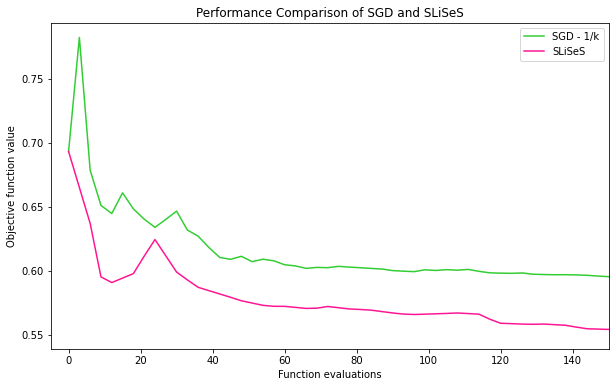

In [1589]:
plt.figure(figsize=(10, 6))
plt.plot(fun_evvsgd1, voice_sgd1, color='limegreen', label='SGD - 1/k')
#plt.plot(func_evaluat_voicekom, performance_data_voicekom, color='deeppink', label='SLiSeS $\gamma_{\mathrm{min}}=1$, $\gamma_{\mathrm{max}}=1.5$')

plt.plot(func_evaluat_voice2, performance_data_voice2, color='deeppink', label='SLiSeS')




plt.xlabel('Function evaluations')
plt.ylabel('Objective function value')
plt.title('Performance Comparison of SGD and SLiSeS')
plt.xlim(-5,150)
#plt.ylim(0.6,0.8)
plt.legend()
#plt.grid()

plt.show()

### Thresholds

In [1652]:
performance_data_voice, func_evaluat_voice,  alpha_voice, spectral_coef_voice, gammas_voice ,dor=algorithm_SLiSeS_regression(voice, np.zeros(310) , 10**(-4), 1, 3,  10**(-8), 10**(8), 10**(-4), 50)

In [1650]:
spectral_coef_voice 

[0.27259307684273104,
 0.2729407947678568,
 28.55627042315374,
 1.5297596961759734,
 1.491687457282594,
 1.7247390081199494,
 5.615998622541242,
 2.521620489729726,
 3.1947534562635806,
 3.173447392968888,
 2.8560395314683005,
 3.0892637494750845,
 0.7774706774280794,
 2.9988659710758996,
 2.54336266270297,
 1.012568016573794,
 2.0684469572100017,
 1.990807150027501,
 1.8750303094842302,
 1.6782061083407371,
 1.7315607032627962,
 0.9357148752180148,
 1.7582782100994936,
 1.7064313917665168,
 1.7069700556555627,
 1.6512161965047525,
 1.6830074231720953,
 1.697592023807635,
 1.3001192363005387,
 1.3315181416375963,
 2.0662219898685232,
 2.097316808386111,
 2.133228166411497,
 2.1134901127826877,
 1.5846325844849578,
 1.6211513118945855,
 0.8918252412049228,
 1.846770689120078,
 1.8022463641663593,
 2.255797129570257,
 1.5436014112123841,
 1.5777711577418325,
 2.057535617888534,
 1.8276160946699807,
 1.8541648155587371,
 2.4562208051591488,
 1.7753762115271638,
 1.8086516323058568,
 2.486

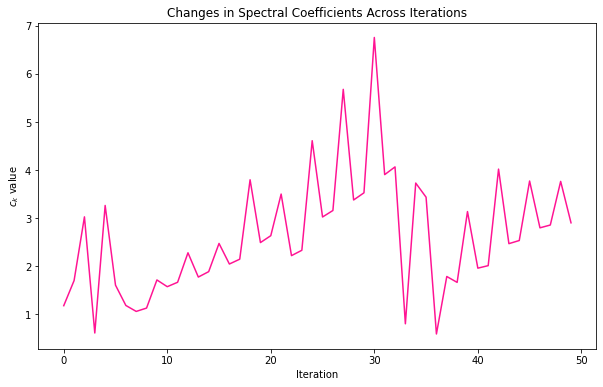

In [1661]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(0,50)), spectral_coef_voice, color='deeppink')

plt.xlabel('Iteration')
plt.ylabel('$c_k$ value')
plt.title('Changes in Spectral Coefficients Across Iterations')


plt.show()  #gledam prvo ponasanje spektralnih koeficienata, pa onda postavljam odgovarajuca ogranicenja

In [1657]:
performance_data_voiceg, func_evaluat_voiceg,  alpha_voiceg, spectral_coef_voiceg, gammas_voiceg ,dorg=algorithm_SLiSeS_regression(voice, np.zeros(310) , 10**(-4), 1, 3,  1, 4, 10**(-4), 50)

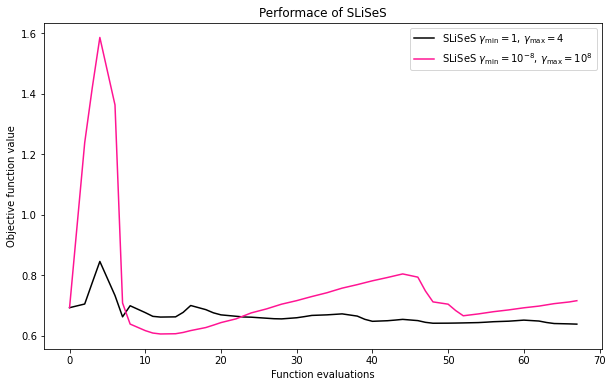

In [1660]:
plt.figure(figsize=(10, 6))

plt.plot(func_evaluat_voiceg, performance_data_voiceg, color='black', label='SLiSeS $\gamma_{\mathrm{min}}=1$, $\gamma_{\mathrm{max}}=4$')
plt.plot(func_evaluat_voice, performance_data_voice, color='deeppink', label='SLiSeS $\gamma_{\mathrm{min}}=10^{-8}$, $\gamma_{\mathrm{max}}=10^{8}$')

plt.xlabel('Function evaluations')
plt.ylabel('Objective function value')
plt.title('Performace of SLiSeS')

plt.legend()


plt.show()

### S - size of samples

In [1437]:
performance_data_voiceS1, func_evaluat_voiceS1,  alpha_voiceS1, spectral_coef_voiceS1, gammas_voiceS1,moraop1 =algorithm_SLiSeS_regression(voice, np.zeros(310) , 10**(-4), 3, 3,  10**(-8), 10**(8), 10**(-4), 50)

In [1016]:
performance_data_voiceS3, func_evaluat_voiceS3,  alpha_voiceS3, spectral_coef_voiceS3, gammas_voiceS3, moraop12 =algorithm_SLiSeS_regression(voice, np.zeros(310) , 10**(-4), 3, 3,  10**(-8), 10**(8), 10**(-4), 84)

In [1022]:
performance_data_voiceS5, func_evaluat_voiceS5,  alpha_voiceS5, spectral_coef_voiceS5, gammas_voiceS5, moraop13 =algorithm_SLiSeS_regression(voice, np.zeros(310) , 10**(-4), 5, 3,  10**(-8), 10**(8), 10**(-4), 50)

In [1434]:
performance_data_voiceS10, func_evaluat_voiceS10,  alpha_voiceS10, spectral_coef_voiceS10, gammas_voiceS10, moraop14 =algorithm_SLiSeS_regression(voice, np.zeros(310) , 10**(-4), 126, 3,  10**(-8), 10**(8), 10**(-4), 50)

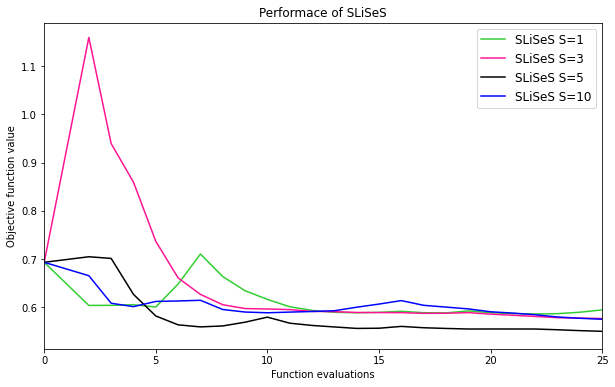

In [1031]:
plt.figure(figsize=(10, 6))
plt.plot(moraop1, performance_data_voiceS1, color='limegreen', label='SLiSeS S=1')
plt.plot(moraop12, performance_data_voiceS3, color='deeppink', label='SLiSeS S=3')
plt.plot(moraop13, performance_data_voiceS5, color='black', label='SLiSeS S=5')
plt.plot(moraop14, performance_data_voiceS10, color='blue', label='SLiSeS S=10')


plt.xlabel('Function evaluations')
plt.ylabel('Objective function value')
plt.title('Performace of SLiSeS')
plt.xlim(0, 25)

plt.legend()
plt.legend(fontsize='large')


plt.show()   

In [750]:
performance_data_voiceS1i, func_evaluat_voiceS1i,  alpha_voiceS1i, spectral_coef_voiceS1i, gammas_voiceS1i,iter_voices1 =algorithm_SLiSeS_regression(voice, np.zeros(310) , 10**(-4), 1, 3,  10**(-8), 10**(8), 10**(-4), 50)

In [751]:
performance_data_voiceS1i3, func_evaluat_voiceS1i3,  alpha_voiceS1i3, spectral_coef_voiceS1i3, gammas_voiceS1i3,iter_voices13 =algorithm_SLiSeS_regression(voice, np.zeros(310) , 10**(-4), 3, 3,  10**(-8), 10**(8), 10**(-4), 50)

In [752]:
performance_data_voiceS1i5, func_evaluat_voiceS1i5,  alpha_voiceS1i5, spectral_coef_voiceS1i5, gammas_voiceS1i5,iter_voices15 =algorithm_SLiSeS_regression(voice, np.zeros(310) , 10**(-4), 5, 3,  10**(-8), 10**(8), 10**(-4), 50)

In [753]:
performance_data_voiceS1i10, func_evaluat_voiceS1i10,  alpha_voiceS1i10, spectral_coef_voiceS1i10, gammas_voiceS1i10,iter_voices110 =algorithm_SLiSeS_regression(voice, np.zeros(310) , 10**(-4), 10, 3,  10**(-8), 10**(8), 10**(-4), 50)

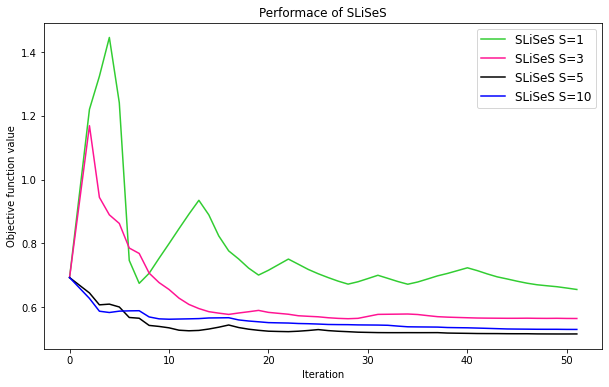

In [1014]:
plt.figure(figsize=(10, 6))
plt.plot(iter_voices1, performance_data_voiceS1i, color='limegreen', label='SLiSeS S=1')
plt.plot(iter_voices13, performance_data_voiceS1i3, color='deeppink', label='SLiSeS S=3')
plt.plot(iter_voices15, performance_data_voiceS1i5, color='black', label='SLiSeS S=5')
plt.plot(iter_voices110, performance_data_voiceS1i10, color='blue', label='SLiSeS S=10')
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.title('Performace of SLiSeS')

plt.legend()
plt.legend(fontsize='large')
plt.show()

### m - number of iternal iterations

In [959]:
performance_data_voice_m3, func_evaluat_voice_m3,  alpha_voice_m3, spectral_coef_voice_m3, gammas_voice_m3,gp3 =algorithm_SLiSeS_regression(voice, np.zeros(310) , 10**(-4), 1, 3,  10**(-8), 10**(8), 10**(-4), 50)

In [955]:
performance_data_voice_m2, func_evaluat_voice_m2,  alpha_voice_m2, spectral_coef_voice_m2, gammas_voice_m2, gp4 =algorithm_SLiSeS_regression(voice, np.zeros(310) , 10**(-4), 1, 2,  10**(-8), 10**(8), 10**(-4), 50)

In [956]:
performance_data_voice_m4, func_evaluat_voice_m4,  alpha_voice_m4, spectral_coef_voice_m4, gammas_voice_m4 , gp5=algorithm_SLiSeS_regression(voice, np.zeros(310) , 10**(-4), 1, 4,  10**(-8), 10**(8), 10**(-4), 50)

In [957]:
performance_data_voice_m5, func_evaluat_voice_m5,  alpha_voice_m5, spectral_coef_voice_m5, gammas_voice_m5 , gp6=algorithm_SLiSeS_regression(voice, np.zeros(310) , 10**(-4), 1, 5,  10**(-8), 10**(8), 10**(-4), 50)

In [977]:
performance_data_voice_m6, func_evaluat_voice_m6,  alpha_voice_m6, spectral_coef_voice_m6, gammas_voice_m6, lp9 =algorithm_SLiSeS_regression(voice, np.zeros(310) , 10**(-4), 1, 10,  10**(-8), 10**(8), 10**(-4), 50)

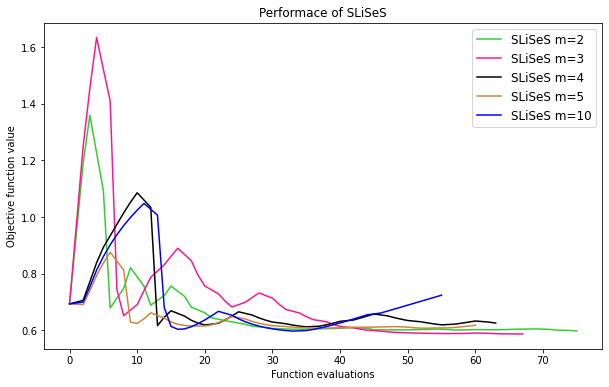

In [978]:
plt.figure(figsize=(10, 6))
plt.plot(func_evaluat_voice_m2, performance_data_voice_m2, color='limegreen', label='SLiSeS m=2')
plt.plot(func_evaluat_voice_m3, performance_data_voice_m3, color='deeppink', label='SLiSeS m=3')
plt.plot(func_evaluat_voice_m4, performance_data_voice_m4, color='black', label='SLiSeS m=4')
plt.plot(func_evaluat_voice_m5, performance_data_voice_m5, color='peru', label='SLiSeS m=5')
plt.plot(func_evaluat_voice_m6, performance_data_voice_m6, color='blue', label='SLiSeS m=10')

plt.xlabel('Function evaluations')
plt.ylabel('Objective function value')
plt.title('Performace of SLiSeS')

plt.legend()
plt.legend(fontsize='large')


plt.show()   #BIRAM m=3

## CINA0 DATASET

### Thresholds - gamma_min, gamma_max

In [830]:
performance_data_cina_g8, func_evaluat_cina_g8,  alpha_cina_g8, spectral_coef_cina_g8, gammas_cina_g8, er8 =algorithm_SLiSeS_regression(cina0, np.zeros(132) , 10**(-4), 1, 3,  10**(-8), 10**(8), 10**(-4), 50)

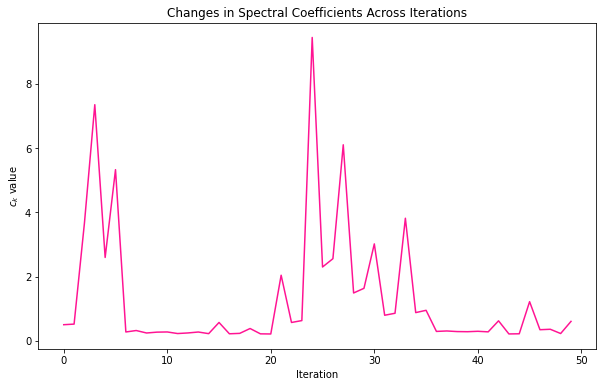

In [1701]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(0,50)), spectral_coef_cina_g8, color='deeppink', label='SLiSeS $\gamma_{\mathrm{min}}=10^{-8}$, $\gamma_{\mathrm{max}}=10^{8}$')



plt.xlabel('Iteration')
plt.ylabel('$c_k$ value')
plt.title('Changes in Spectral Coefficients Across Iterations')


plt.show() 

In [1692]:
performance_data_cina_g8kom, func_evaluat_cina_g8kom,  alpha_cina_g8kom, spectral_coef_cina_g8kom, gammas_cina_g8kom, onmor8 =algorithm_SLiSeS_regression(cina0, np.zeros(132) , 10**(-4), 1, 3,  0.5, 5, 10**(-4), 50)

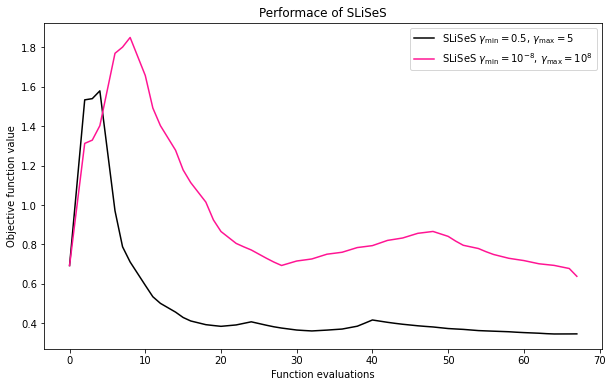

In [1694]:
plt.figure(figsize=(10, 6))
plt.plot(func_evaluat_cina_g8kom, performance_data_cina_g8kom, color='black', label='SLiSeS $\gamma_{\mathrm{min}}=0.5$, $\gamma_{\mathrm{max}}=5$')
plt.plot(func_evaluat_cina_g8, performance_data_cina_g8, color='deeppink', label='SLiSeS $\gamma_{\mathrm{min}}=10^{-8}$, $\gamma_{\mathrm{max}}=10^{8}$')

plt.xlabel('Function evaluations')
plt.ylabel('Objective function value')
plt.title('Performace of SLiSeS')

plt.legend()

plt.show() 

In [983]:
performance_data_cinam3, func_evaluat_cinam3,  alpha_cinam3, spectral_coef_cinam3, gammas_cinam3 , tr3=algorithm_SLiSeS_regression(cina0, np.zeros(132) , 10**(-4), 1, 3,  10**(-8), 10**(8), 10**(-4), 50)

In [984]:
performance_data_cinam4, func_evaluat_cinam4,  alpha_cinam4, spectral_coef_cinam4, gammas_cinam4, tr4 =algorithm_SLiSeS_regression(cina0, np.zeros(132) , 10**(-4), 1, 4,  10**(-8), 10**(8), 10**(-4), 50)

In [988]:
performance_data_cinam5, func_evaluat_cinam5,  alpha_cinam5, spectral_coef_cinam5, gammas_cinam5, tr5 =algorithm_SLiSeS_regression(cina0, np.zeros(132) , 10**(-4), 1, 5,  10**(-8), 10**(8), 10**(-4), 50)

In [986]:
performance_data_cinam2, func_evaluat_cinam2,  alpha_cinam2, spectral_coef_cinam2, gammas_cinam2 , tr6=algorithm_SLiSeS_regression(cina0, np.zeros(132) , 10**(-4), 1, 2,  10**(-8), 10**(8), 10**(-4), 50)

In [980]:
performance_data_cinam6, func_evaluat_cinam6,  alpha_cinam6, spectral_coef_cinam6, gammas_cinam6, kois2 =algorithm_SLiSeS_regression(cina0, np.zeros(132) , 10**(-4), 1, 10,  10**(-8), 10**(8), 10**(-4), 50)

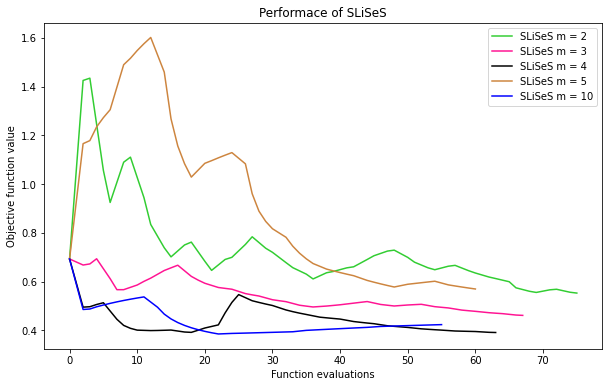

In [989]:
plt.figure(figsize=(10, 6))

plt.plot(func_evaluat_cinam2, performance_data_cinam2, color='limegreen', label='SLiSeS m = 2')
plt.plot(func_evaluat_cinam3, performance_data_cinam3, color='deeppink', label='SLiSeS m = 3')
plt.plot(func_evaluat_cinam4, performance_data_cinam4, color='black', label='SLiSeS m = 4')
plt.plot(func_evaluat_cinam5, performance_data_cinam5, color='peru', label='SLiSeS m = 5')
plt.plot(func_evaluat_cinam6, performance_data_cinam6, color='blue', label='SLiSeS m = 10')


plt.xlabel('Function evaluations')
plt.ylabel('Objective function value')
plt.title('Performace of SLiSeS')

plt.legend()

plt.show()

## ADULT DATASET

### m 

In [992]:
#m=3
performance_data_adult_m3, func_evalu_adult_m3,  alpha_adult_m3, spectral_coef_adult_m3, gammas_adult_m3, iterbrc1 =algorithm_SLiSeS_regression(data_t, np.zeros(123) , 10**(-4), 1, 3,  10**(-8), 10**(8), 10**(-4), 50)

In [999]:
#m=2
performance_data_adult_m2, func_evalu_adult_m2,  alpha_adult_m2, spectral_coef_adult_m2, gammas_adult_m2, iterbrc12 =algorithm_SLiSeS_regression(data_t, np.zeros(123) , 10**(-4), 1, 2,  10**(-8), 10**(8), 10**(-4), 50)

In [1007]:
#m=4
performance_data_adult_m4, func_evalu_adult_m4,  alpha_adult_m4, spectral_coef_adult_m4, gammas_adult_m4, iterbrc13 =algorithm_SLiSeS_regression(data_t, np.zeros(123) , 10**(-4), 1, 4,  10**(-8), 10**(8), 10**(-4), 50)

In [995]:
performance_data_adult_m5, func_evalu_adult_m5,  alpha_adult_m5, spectral_coef_adult_m5, gammas_adult_m5, iterbrc14=algorithm_SLiSeS_regression(data_t, np.zeros(123) , 10**(-4), 1, 5,  10**(-8), 10**(8), 10**(-4), 50)

In [996]:
performance_data_adult_m6, func_evalu_adult_m6,  alpha_adult_m6, spectral_coef_adult_m6, gammas_adult_m6, iterbrc16 =algorithm_SLiSeS_regression(data_t, np.zeros(123) , 10**(-4), 1, 10,  10**(-8), 10**(8), 10**(-4), 50)

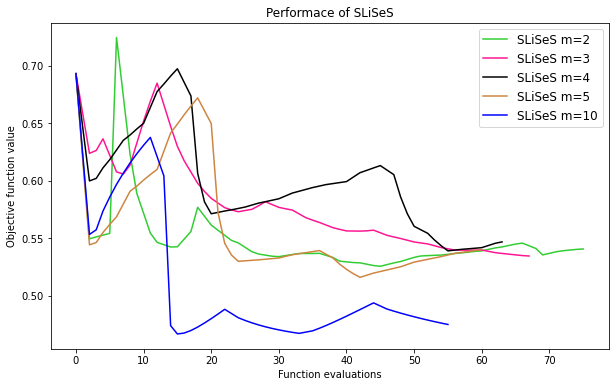

In [1008]:
plt.figure(figsize=(10, 6))
plt.plot(func_evalu_adult_m2, performance_data_adult_m2, color='limegreen', label='SLiSeS m=2')
plt.plot(func_evalu_adult_m3, performance_data_adult_m3, color='deeppink', label='SLiSeS m=3')
plt.plot(func_evalu_adult_m4, performance_data_adult_m4, color='black', label='SLiSeS m=4')
plt.plot(func_evalu_adult_m5, performance_data_adult_m5, color='peru', label='SLiSeS m=5')
plt.plot(func_evalu_adult_m6, performance_data_adult_m6, color='blue', label='SLiSeS m=10')

plt.xlabel('Function evaluations')
plt.ylabel('Objective function value')
plt.title('Performace of SLiSeS')


plt.legend()
plt.legend(fontsize='large')

plt.show()   

### Comparison of SGD and SLiSeS

In [1567]:
pdasgd, evasgf, itasgd=algorithm_SGD(data_t,  np.zeros(123) , 10**(-4), 3, 10**(-4), 50)

In [1590]:
performance_data_adult_gsgd8, func_evalu_adult_gsgd8,  alpha_adult_gsgd8, spectral_coef_adult_gsgd8, gammas_adult_gsgd8, nzm5 =algorithm_SLiSeS_regression(data_t, np.zeros(123) , 10**(-4), 3, 3,  10**(-8), 10**(8), 10**(-4), 50)

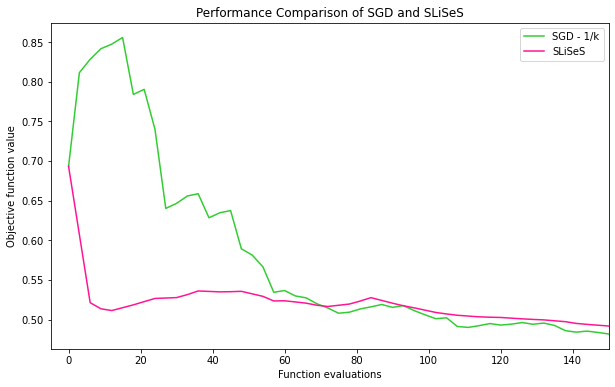

In [1592]:
plt.figure(figsize=(10, 6))
plt.plot(evasgf, pdasgd, color='limegreen', label='SGD - 1/k')
plt.plot(func_evalu_adult_gsgd8, performance_data_adult_gsgd8, color='deeppink', label='SLiSeS')

plt.xlabel('Function evaluations')
plt.ylabel('Objective function value')
plt.title('Performance Comparison of SGD and SLiSeS')

plt.legend()
#plt.legend(fontsize='large')
plt.xlim(-5, 150)
plt.show()  

# Sum of Quadradic Functions

In [303]:
# matrix A
def matrix_A(n): #n je dimenzija
    A = np.zeros((n,n)) 
    D = np.diag(np.random.uniform(1, 101, size=(n,)))
    C = np.random.normal(size=(n, n))
    E = 0.5 * (C + C.T) #simetricna matrica
    eigenvalues, eigenvectors = np.linalg.eigh(E) #za dobijanje kakrakteristicnih vektora hermitskih matrica - ortonormalnost karakterističnih vektora hermitske matrice važi samo ako matrica ima realne vrednosti.
    Q = eigenvectors
    A = np.dot(Q, np.dot(D, Q.T)) #dobija se simetericna matrica i pozitivno definitna (posto je matrica D ima strogo pozitivne dijagonalne elemente)
    return A

In [304]:
matrix_A(3) #proba

array([[19.68877414,  5.85592804,  2.07993769],
       [ 5.85592804, 21.57085538, 16.5441641 ],
       [ 2.07993769, 16.5441641 , 50.17049451]])

In [305]:
# vector b
def vector_b(n):
    b = np.random.uniform(1, 31, size=(n,)) #real
    return b

In [306]:
vector_b(2) #proba

array([14.46756707, 16.52625457])

In [307]:
#pomocna funkcija
def quadratic_function1(x): 
    s = x.size
    A = matrix_A(s)
    b = vector_b(s)
    return  A, b
   

In [308]:
def generating_q_functions(N, dimension): #ovde generisem N matrica A i N vektora b (dimenzije dimension) za kvadratne funkcije
    f=[]
    for i in range(N):
        x=np.random.uniform(size=(dimension,))
        a=quadratic_function1(x)
        A= a[0]
        b=a[1]
        f.append((A,b)) 
    return f #dobijam uredjene parove (A,b)
     

In [310]:
par_of_q_f= generating_q_functions(1000, 10) #primer - na ovaj nacin je sam fiksirala Ai-eve i bi-eve koje cu koristiti 


In [309]:
#sada pravim sumu funkcija, takodje racunam i gradient
def sumf(x, t): #x je tacka u kojoj racunam vrednost, a t su parametri koji se generisu funkcijom generating_q_functions
    s = 0 #suma-vrednost funkcije u x
    s2=0 #gradient funkicije u x
    for i in range(len(t)):
        A, b = t[i][0], t[i][1]
        gradient = np.dot(A, x - b)
        s2+= gradient / len(t)
        s += 0.5 * np.dot((x - b).T, gradient) /len(t)
    return s, s2

In [1431]:
par_of_q_f[0][1]

array([23.21327363,  4.46607444, 23.72336747,  8.8965464 , 27.55359546,
       15.12057648, 17.09477384,  2.84873612, 29.65413291, 19.44444756])

In [1550]:
#SGD kada ja funkcija cilja kvadratna
def algorithm_SGDQ(parametri_funkcije, x, eta, S, maxiter): #proledjujem parametre kvadratnih funkcija
    k=1 #mora krenuti od 1, inace cu imati deljenje sa nulom
    S=S
    N=list(range(1, len(par_of_q_f)))
    evaluations=0
    performance_data=[] 
    evaluations_list=[0]   
    num_of_iter=[0]

    while k <= maxiter: #maxiter
        
        
        performance_data.append(sumf(x, parametri_funkcije)[0]) 
        

        
        #STEP 1 - Sampling

        subsetN=random.sample(list(N), S)
      
            
        #STEP 2 - Computing gradient 
        
        
        sf = [parametri_funkcije[i] for i in subsetN] #u ovom koraku izdvajam parametre kvadratne funkcije koji ce biti koriscenji
        new_func = partial(sumf, t=sf) #parametri se fiksitaju, a x je promenljiva

        

        f_Nk, gk = new_func(x)  #u ovom korkaku sam izracunaka i f_Nk i gradient
        evaluations+=S #pa ovde dodajem S
 
            
        #STEP 4 - gamma
        gamma_k= 1/k
        
        
        #STEP 5 - Search direction
        dk = -(gamma_k * gk)
        

        x_prev = x.copy()
        gk_prev = gk.copy()
        

        x = x +  dk
        k+=1
        if k== (maxiter + 1):
            performance_data.append(sumf(x, parametri_funkcije)[0]) 
        evaluations_list.append(evaluations)
        num_of_iter.append(k)


    return  performance_data, evaluations_list,  num_of_iter

In [1724]:
#za kvadratne funkcija
def algorithm_SLiSeS(parametri_funkcije, x, eta, S, m,  gamma_min, gamma_max, maxiter): #proledjujem parametre kvadratnih funkcija
    k=1 #mora krenuti od 1, inace cu imati deljenje sa nulom
    S=S
    N=list(range(1, len(par_of_q_f)))
    evaluations=0
    performance_data=[] 
    evaluations_list=[0]
    alfaniz=[]
    num_of_iter=[0]
    ck_list=[]
    while k <= maxiter: #maxiter
        
        
        performance_data.append(sumf(x, parametri_funkcije)[0]) 
        
        tk= 1/2**k
        
        #STEP 1 - Sampling
        
        if (k-1) % m == 0:
            subsetN=random.sample(list(N), S)
        else:
            subsetN = subsetN
            
        #STEP 2 - Computing gradient 
        
        
        sf = [parametri_funkcije[i] for i in subsetN] #u ovom koraku izdvajam parametre kvadratne funkcije koji ce biti koriscenji
        new_func = partial(sumf, t=sf) #parametri se fiksitaju, a x je promenljiva
        
        
        
        if (k-1) % m == 0: 
            f_Nk, gk = new_func(x)  #u ovom korkaku sam izracunaka i f_Nk i gradient
            evaluations+=S #pa ovde dodajem S
        else:
            
            f_Nk=new_f_Nk_x
            gk=new_gk
            
        #STEP 3 - Spectral coefficient    
        if  (k-1)%m==0 and m>1:
            ck = 1/np.linalg.norm(gk)
            
        else:
            s_km1 = x - x_prev
            y_km1 = gk - gk_prev
            ck = np.linalg.norm(s_km1) ** 2 / np.dot(s_km1, y_km1)
            
        #STEP 4 - gamma
        gamma_k= (min(gamma_max, max(gamma_min, ck)))/k
        
        
        #STEP 5 - Search direction
        dk = -(gamma_k * gk)
        
        #STEP 6 - Step size
        alpha_k, e_lsp, new_f_Nk_x, new_gk = algorithm_LSP(x, eta, gamma_k,tk, dk, gk, new_func, f_Nk, S)
        evaluations+= e_lsp
        alfaniz.append(alpha_k)
        
        #STEP 7 
        new_f_Nk_x, new_gk= new_func(x+dk)
        evaluations+= S
        x_prev = x.copy()
        gk_prev = gk.copy() 
        x = x + alpha_k * dk 
        k+=1
        if k== (maxiter + 1):
            performance_data.append(sumf(x, parametri_funkcije)[0]) 
        evaluations_list.append(evaluations)
        num_of_iter.append(k)
        ck_list.append(ck)

    return  performance_data, evaluations_list, alfaniz , num_of_iter, ck_list

In [580]:
def algorithm_LSP(xk, eta,  gamma_k,tk, dk, gk, new_func, f_Nk, S):
    
    evaluations2=0
    dmk= np.dot(dk, gk)
    alphaj=1
    j=0
    while True:
        f_Nk_a, g_Nk_a= new_func(xk+alphaj*dk) #i ovde racunam f_Nk(xk+alphaj*dk)
        evaluations2+=S #pa onda dodajem S
        
        if f_Nk_a <= f_Nk +eta*alphaj*dmk+tk:
            alphak= alphaj
            j+=1
            return alphak, evaluations2, f_Nk_a , g_Nk_a
            
        else:
            if alphaj>0.1:
                alphaj_new=(-dmk*(alphaj)**2)/(2*(f_Nk_a-f_Nk-alphaj*dmk)) 
                if alphaj_new<0.1*alphaj or alphaj_new>0.9*alphaj:
                    alphaj_new=alphaj/2
                alphaj= alphaj_new  
                j+=1
            else:
                alphaj=alphaj/2
                j+=1
    return alphak, evaluations2           
             

# Results

## m

In [313]:
par_of_q_f= generating_q_functions(1000, 10) 

In [887]:
performance_dataq10_m3 , eq_m3, alphaq10_m3,t6 =algorithm_SLiSeS(par_of_q_f, np.zeros(10), 10**(-4), 1, 3,  10**(-8), 10**(8), 50)

In [923]:
performance_dataq10_m4 , eq_m4, alphaq10_m4,y65 =algorithm_SLiSeS(par_of_q_f, np.zeros(10), 10**(-4), 1, 4,  10**(-8), 10**(8), 50)

In [879]:
performance_dataq10_m5 , eq_m5, alphaq10_m5,dos7 =algorithm_SLiSeS(par_of_q_f, np.zeros(10), 10**(-4), 1, 5,  10**(-8), 10**(8),50)

In [1217]:
performance_dataq10_m6 , eq_m6, alphaq10_m6,q9 ,lp=algorithm_SLiSeS(par_of_q_f, np.zeros(10), 10**(-4), 1, 10,  10**(-8), 10**(8), 50)

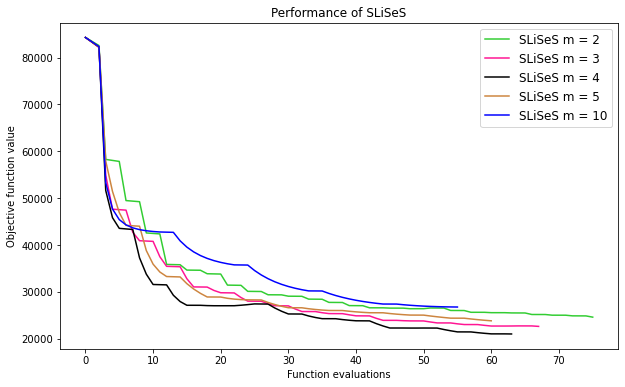

In [1228]:
plt.figure(figsize=(10,6))
plt.plot(eq_m2, performance_dataq10_m2, color='limegreen', label='SLiSeS m = 2') 
plt.plot(eq_m3,performance_dataq10_m3, color='deeppink', label='SLiSeS m = 3')
plt.plot(eq_m4,performance_dataq10_m4, color='black', label='SLiSeS m = 4')
plt.plot(eq_m5,performance_dataq10_m5, color='peru', label='SLiSeS m = 5')
plt.plot(eq_m6,performance_dataq10_m6, color='blue', label='SLiSeS m = 10')

plt.xlabel('Function evaluations')
plt.ylabel('Objective function value')
plt.title('Performance of SLiSeS')
plt.legend()
plt.legend(fontsize='large')

plt.show()

In [329]:
par_of_q_f2= generating_q_functions(1000, 100) 

In [1244]:
performance_dataq100_m2, eq100_m2, alphaq100_m2, i34 , mjk =algorithm_SLiSeS(par_of_q_f2, np.zeros(100), 10**(-4),  1, 2, 10**(-8), 10**(8), 50)

In [938]:
performance_dataq100_m3, eq100_m3, alphaq100_m3, i76  =algorithm_SLiSeS(par_of_q_f2, np.zeros(100), 10**(-4),  1, 3, 10**(-8), 10**(8), 50)

In [930]:
performance_dataq100_m4, eq100_m4, alphaq100_m4,iqw3  =algorithm_SLiSeS(par_of_q_f2, np.zeros(100), 10**(-4),  1, 4, 10**(-8), 10**(8), 50)

In [913]:
performance_dataq100_m5, eq100_m5, alphaq100_m5, i98  =algorithm_SLiSeS(par_of_q_f2, np.zeros(100), 10**(-4),  1, 5, 10**(-8), 10**(8), 50)

In [1213]:
performance_dataq100_m6, eq100_m6, alphaq100_m6 ,i90, pol  =algorithm_SLiSeS(par_of_q_f2, np.zeros(100), 10**(-4),  1, 6, 10**(-8), 10**(8), 50)

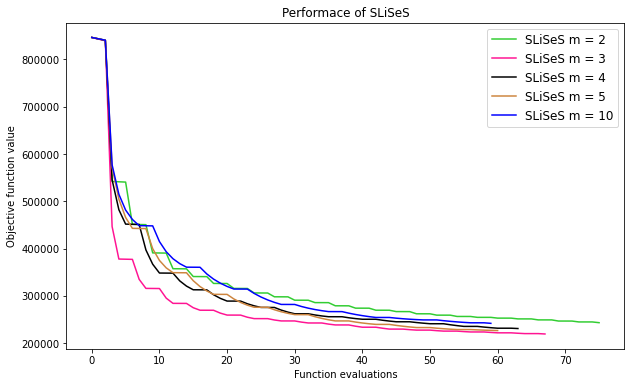

In [1245]:
plt.figure(figsize=(10, 6))
plt.plot(eq100_m2, performance_dataq100_m2, color='limegreen', label='SLiSeS m = 2') 
plt.plot(eq100_m3,performance_dataq100_m3, color='deeppink', label='SLiSeS m = 3')
plt.plot(eq100_m4,performance_dataq100_m4, color='black', label='SLiSeS m = 4')
plt.plot(eq100_m5,performance_dataq100_m5, color='peru', label='SLiSeS m = 5')
plt.plot(eq100_m6,performance_dataq100_m6, color='blue', label='SLiSeS m = 10')

plt.xlabel('Function evaluations')
plt.ylabel('Objective function value')
plt.title('Performace of SLiSeS')
plt.legend()
plt.legend(fontsize='large')

plt.show()

## S

In [757]:
performance_dataq10_S1 , eq_S1, alphaq10_S1,qi101 =algorithm_SLiSeS(par_of_q_f, np.zeros(10), 10**(-4), 1, 3,  10**(-8), 10**(8),250)

In [758]:
performance_dataq10_S3 , eq_S3, alphaq10_S3, qi103 =algorithm_SLiSeS(par_of_q_f, np.zeros(10), 10**(-4), 3, 3,  10**(-8), 10**(8), 84)

In [759]:
performance_dataq10_S5 , eq_S5, alphaq10_S5, qi105 =algorithm_SLiSeS(par_of_q_f, np.zeros(10), 10**(-4), 5, 3,  10**(-8), 10**(8), 50)

In [1320]:
performance_dataq10_S10 , eq_S10, alphaq10_S10, qi1010, klc =algorithm_SLiSeS(par_of_q_f, np.zeros(10), 10**(-4), 10, 3,  10**(-8), 10**(8),25)

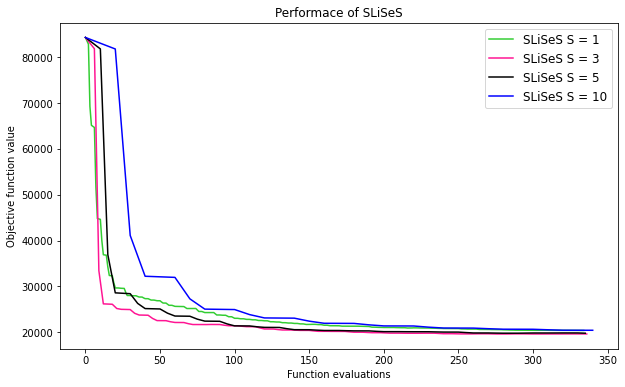

In [1321]:
plt.figure(figsize=(10, 6))
plt.plot(eq_S1, performance_dataq10_S1, color='limegreen', label='SLiSeS S = 1') 
plt.plot(eq_S3,performance_dataq10_S3, color='deeppink', label='SLiSeS S = 3')
plt.plot(eq_S5,performance_dataq10_S5, color='black', label='SLiSeS S = 5')
plt.plot(eq_S10,performance_dataq10_S10, color='blue', label='SLiSeS S = 10')

plt.xlabel('Function evaluations')
plt.ylabel('Objective function value')
plt.title('Performace of SLiSeS')
plt.legend()
plt.legend(fontsize='large')

plt.show()

## thresholds

In [1357]:
#ovo
performance_dataq10_m3g1 , eq_m3g1, alphaq10_m3g1,itt, listck1,  =algorithm_SLiSeS(par_of_q_f, np.zeros(10), 10**(-4), 1, 3,  10**(-8), 10**(8), 50)

In [1297]:
#ovaj
performance_dataq10_m3g2prl , eq_m3g2prl, alphaq10_m3g2prl,nmxl , listck14l=algorithm_SLiSeS(par_of_q_f, np.zeros(10), 10**(-4), 1, 3,  0.01, 100, 50)

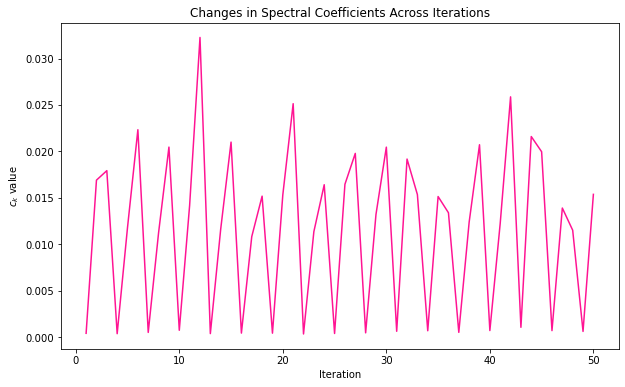

In [1597]:
plt.figure(figsize=(10,6))
plt.plot(list(range(1,51)), listck1, color='deeppink')

plt.xlabel('Iteration')
plt.ylabel('$c_k$ value')
plt.title('Changes in Spectral Coefficients Across Iterations')

plt.show()

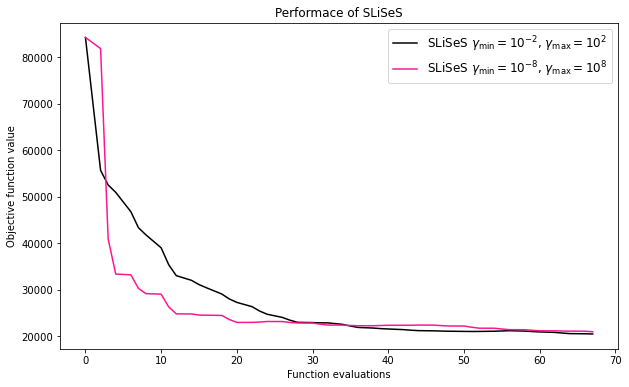

In [1639]:
plt.figure(figsize=(10,6))

plt.plot(eq_m3g2prl, performance_dataq10_m3g2prl, color='black', label=  'SLiSeS $\gamma_{\mathrm{min}}=10^{-2}$, $\gamma_{\mathrm{max}}=10^{2}$')

plt.plot(eq_m3g1, performance_dataq10_m3g1, color='deeppink', label=  'SLiSeS $\gamma_{\mathrm{min}}=10^{-8}$, $\gamma_{\mathrm{max}}=10^{8}$')

plt.xlabel('Function evaluations')
plt.ylabel('Objective function value')
plt.title('Performace of SLiSeS')
plt.legend()
plt.legend(fontsize='large')
plt.show()

In [1600]:
performance_dataq100_m3g2, eq100_m3g2, alphaq100_m3g2,itq1 ,speckoef1 =algorithm_SLiSeS(par_of_q_f2, np.zeros(100), 10**(-4),  1, 3, 10**(-8), 10**(8),50)

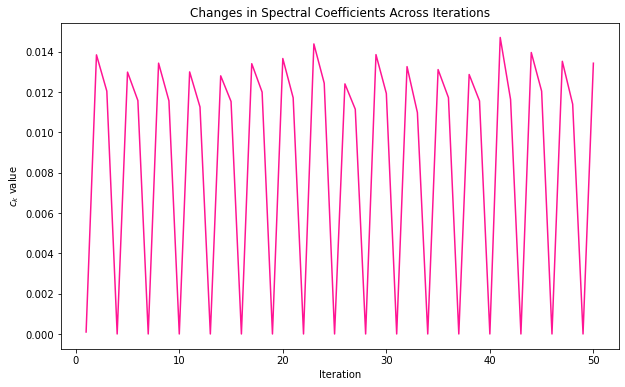

In [1633]:
plt.figure(figsize=(10,6))
plt.plot(list(range(1,51)), speckoef1, color='deeppink')

plt.xlabel('Iteration')
plt.ylabel('$c_k$ value')
plt.title('Changes in Spectral Coefficients Across Iterations')


plt.show()

In [1636]:
#2
performance_dataq100_m3g11, eq100_m3g11, alphaq100_m3g11, itq21 , speckoef13 =algorithm_SLiSeS(par_of_q_f2, np.zeros(100), 10**(-4),  1, 3, 0.01, 100, 50)

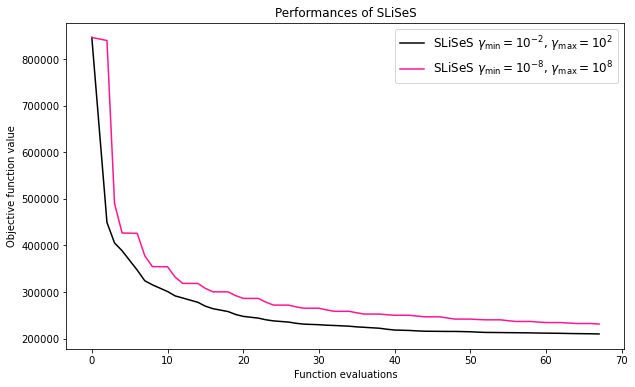

In [1640]:
plt.figure(figsize=(10,6))

plt.plot(eq100_m3g11, performance_dataq100_m3g11, color='black', label=  'SLiSeS $\gamma_{\mathrm{min}}=10^{-2}$, $\gamma_{\mathrm{max}}=10^{2}$')
plt.plot(eq100_m3g2, performance_dataq100_m3g2, color='deeppink', label=  'SLiSeS $\gamma_{\mathrm{min}}=10^{-8}$, $\gamma_{\mathrm{max}}=10^{8}$')



plt.xlabel('Function evaluations')
plt.ylabel('Objective function value')
plt.title('Performances of SLiSeS')
plt.legend()
plt.legend(fontsize='large')
#lt.xlim(100, 200)
plt.show()